In [ ]:
%pip install ultralytics==8.0.11
%pip install roboflow

%matplotlib inline

In [1]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.32  Python-3.11.5 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Setup complete  (12 CPUs, 7.6 GB RAM, 117.4/176.3 GB disk)


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="3ju2JNgDqES3UJjoqYi7")
project = rf.workspace("detection-3sxwh").project("car-detection-uekjp")
dataset = project.version(2).download("yolov8")


In [6]:
!ls datasets/

Car-Detection-2


In [7]:
!yolo task=detect mode=train model=yolov8s.pt data=datasets/Car-Detection-2/data.yaml epochs=25 imgsz=800 v5loader=True

100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 65.1MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/Car-Detection-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimi

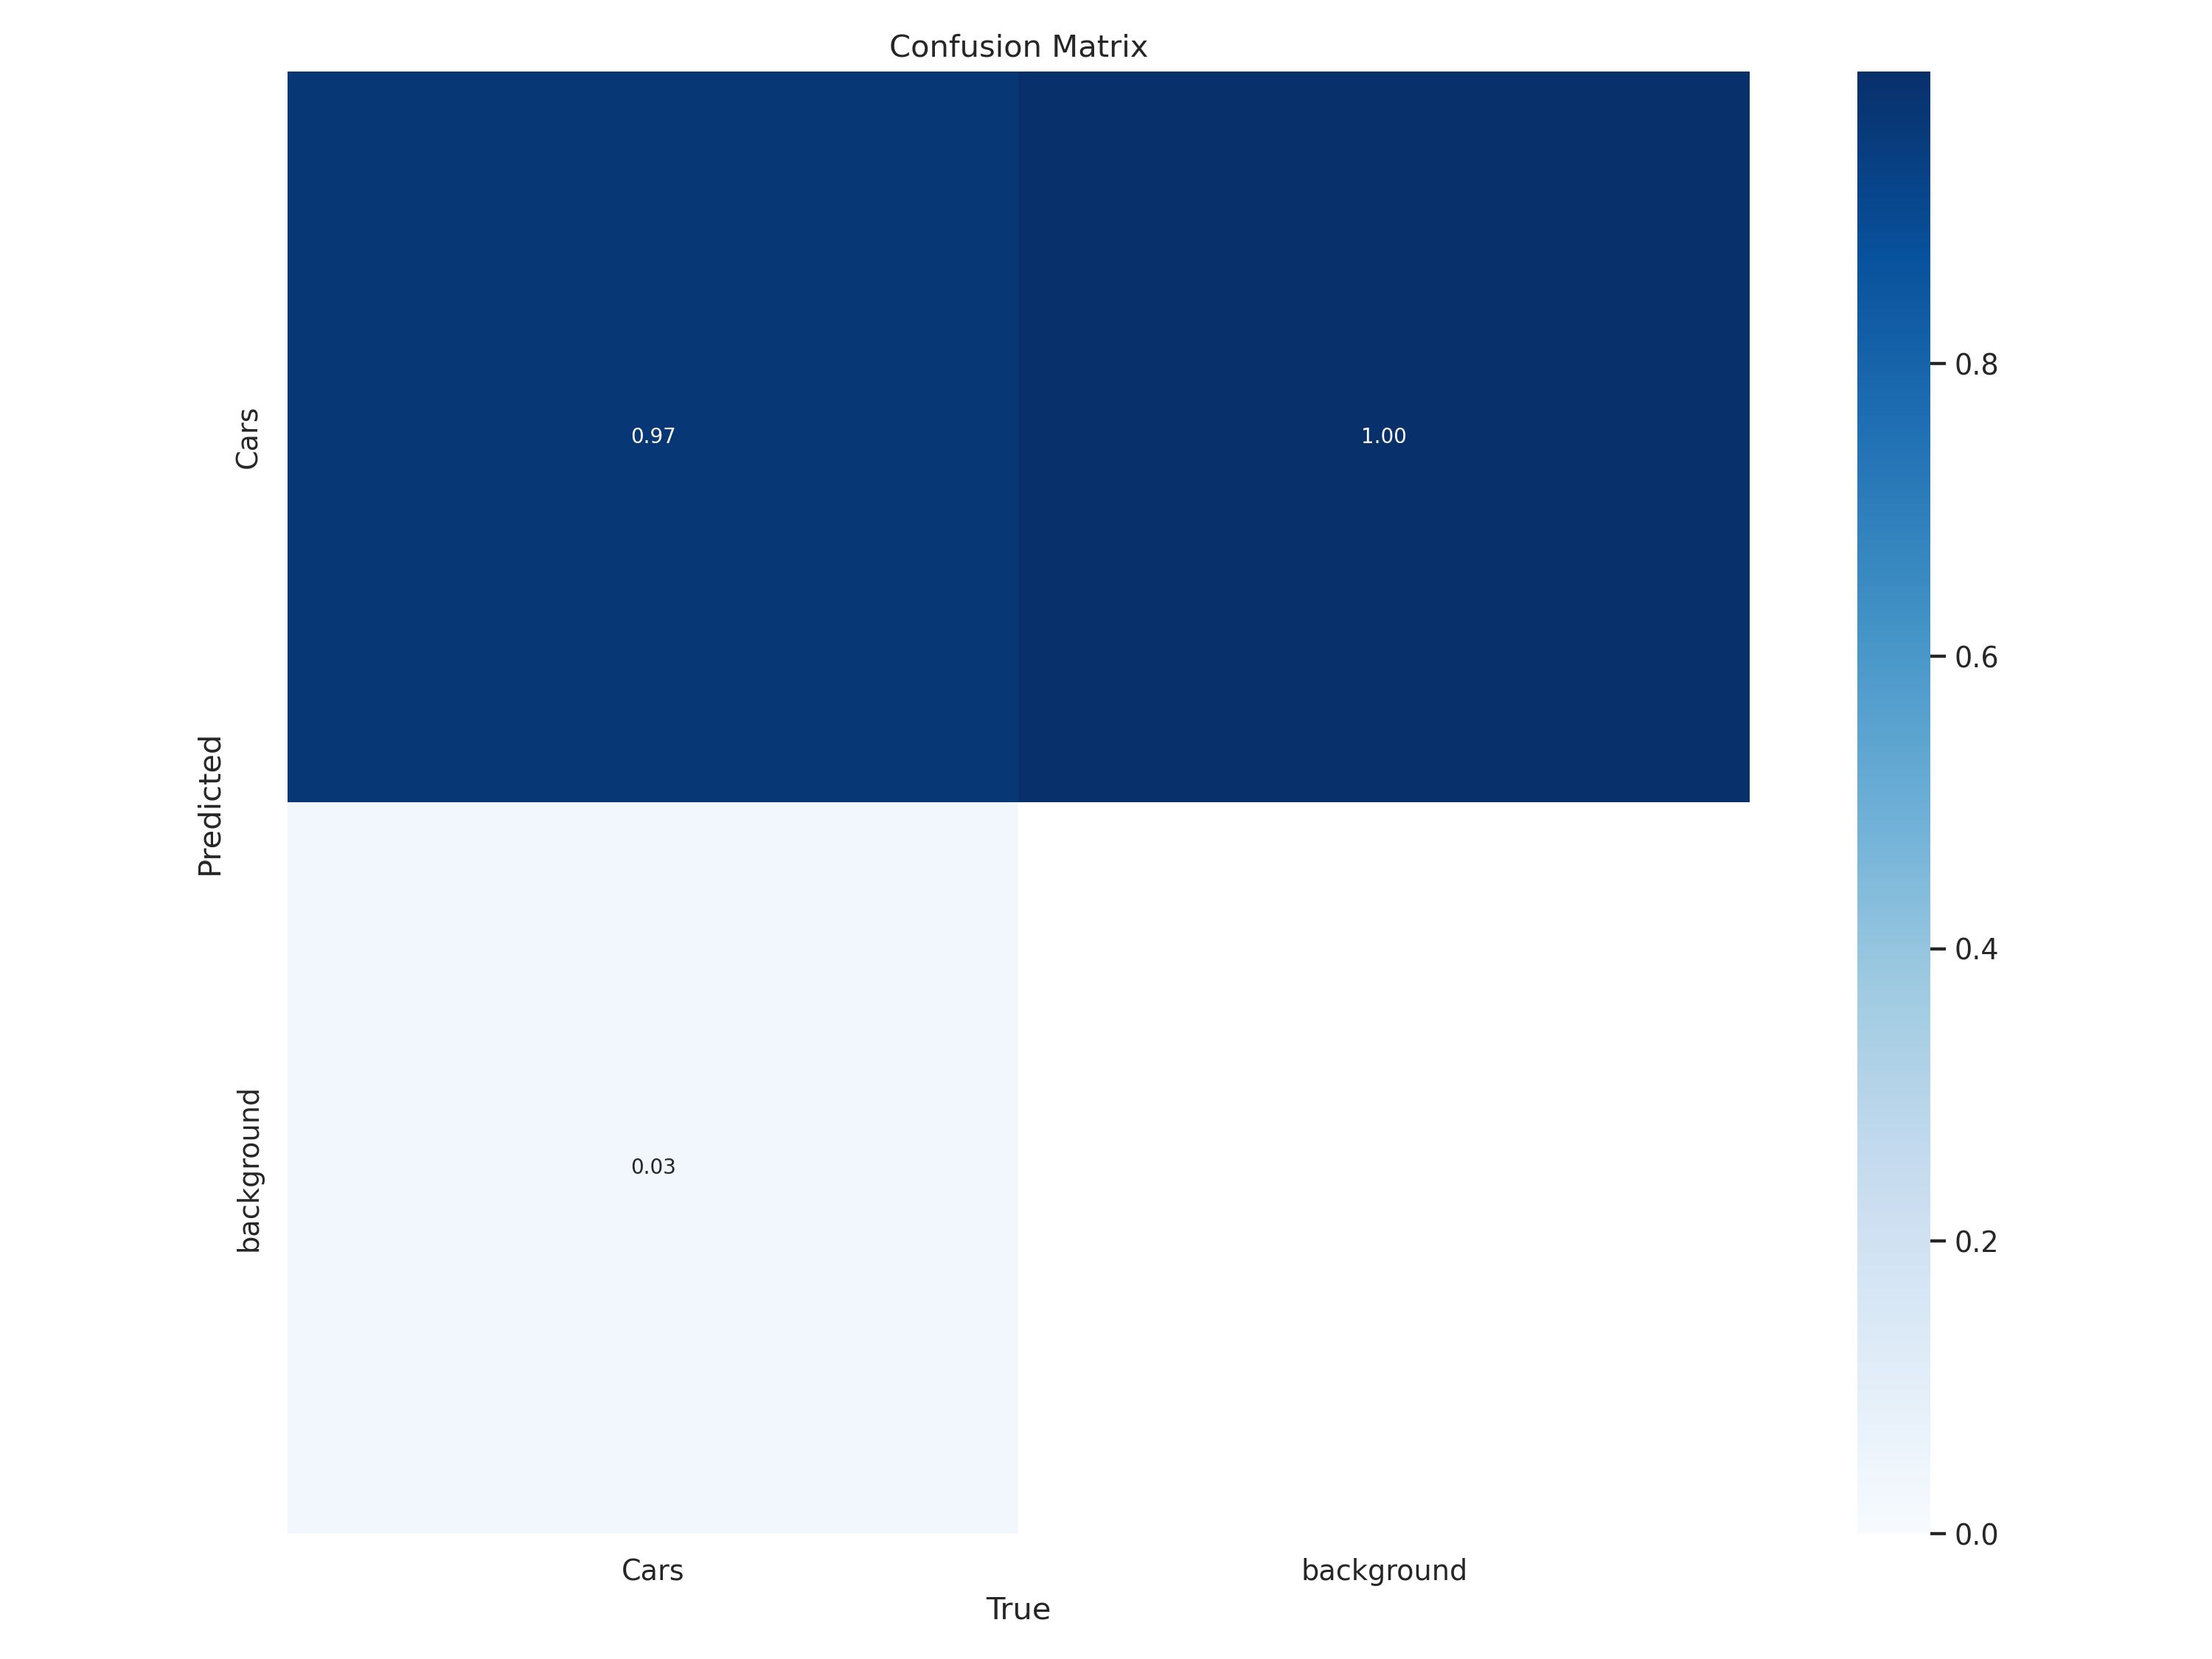

In [8]:
Image(filename=f'/kaggle/working/datasets/runs/detect/train/confusion_matrix.png', width=600)

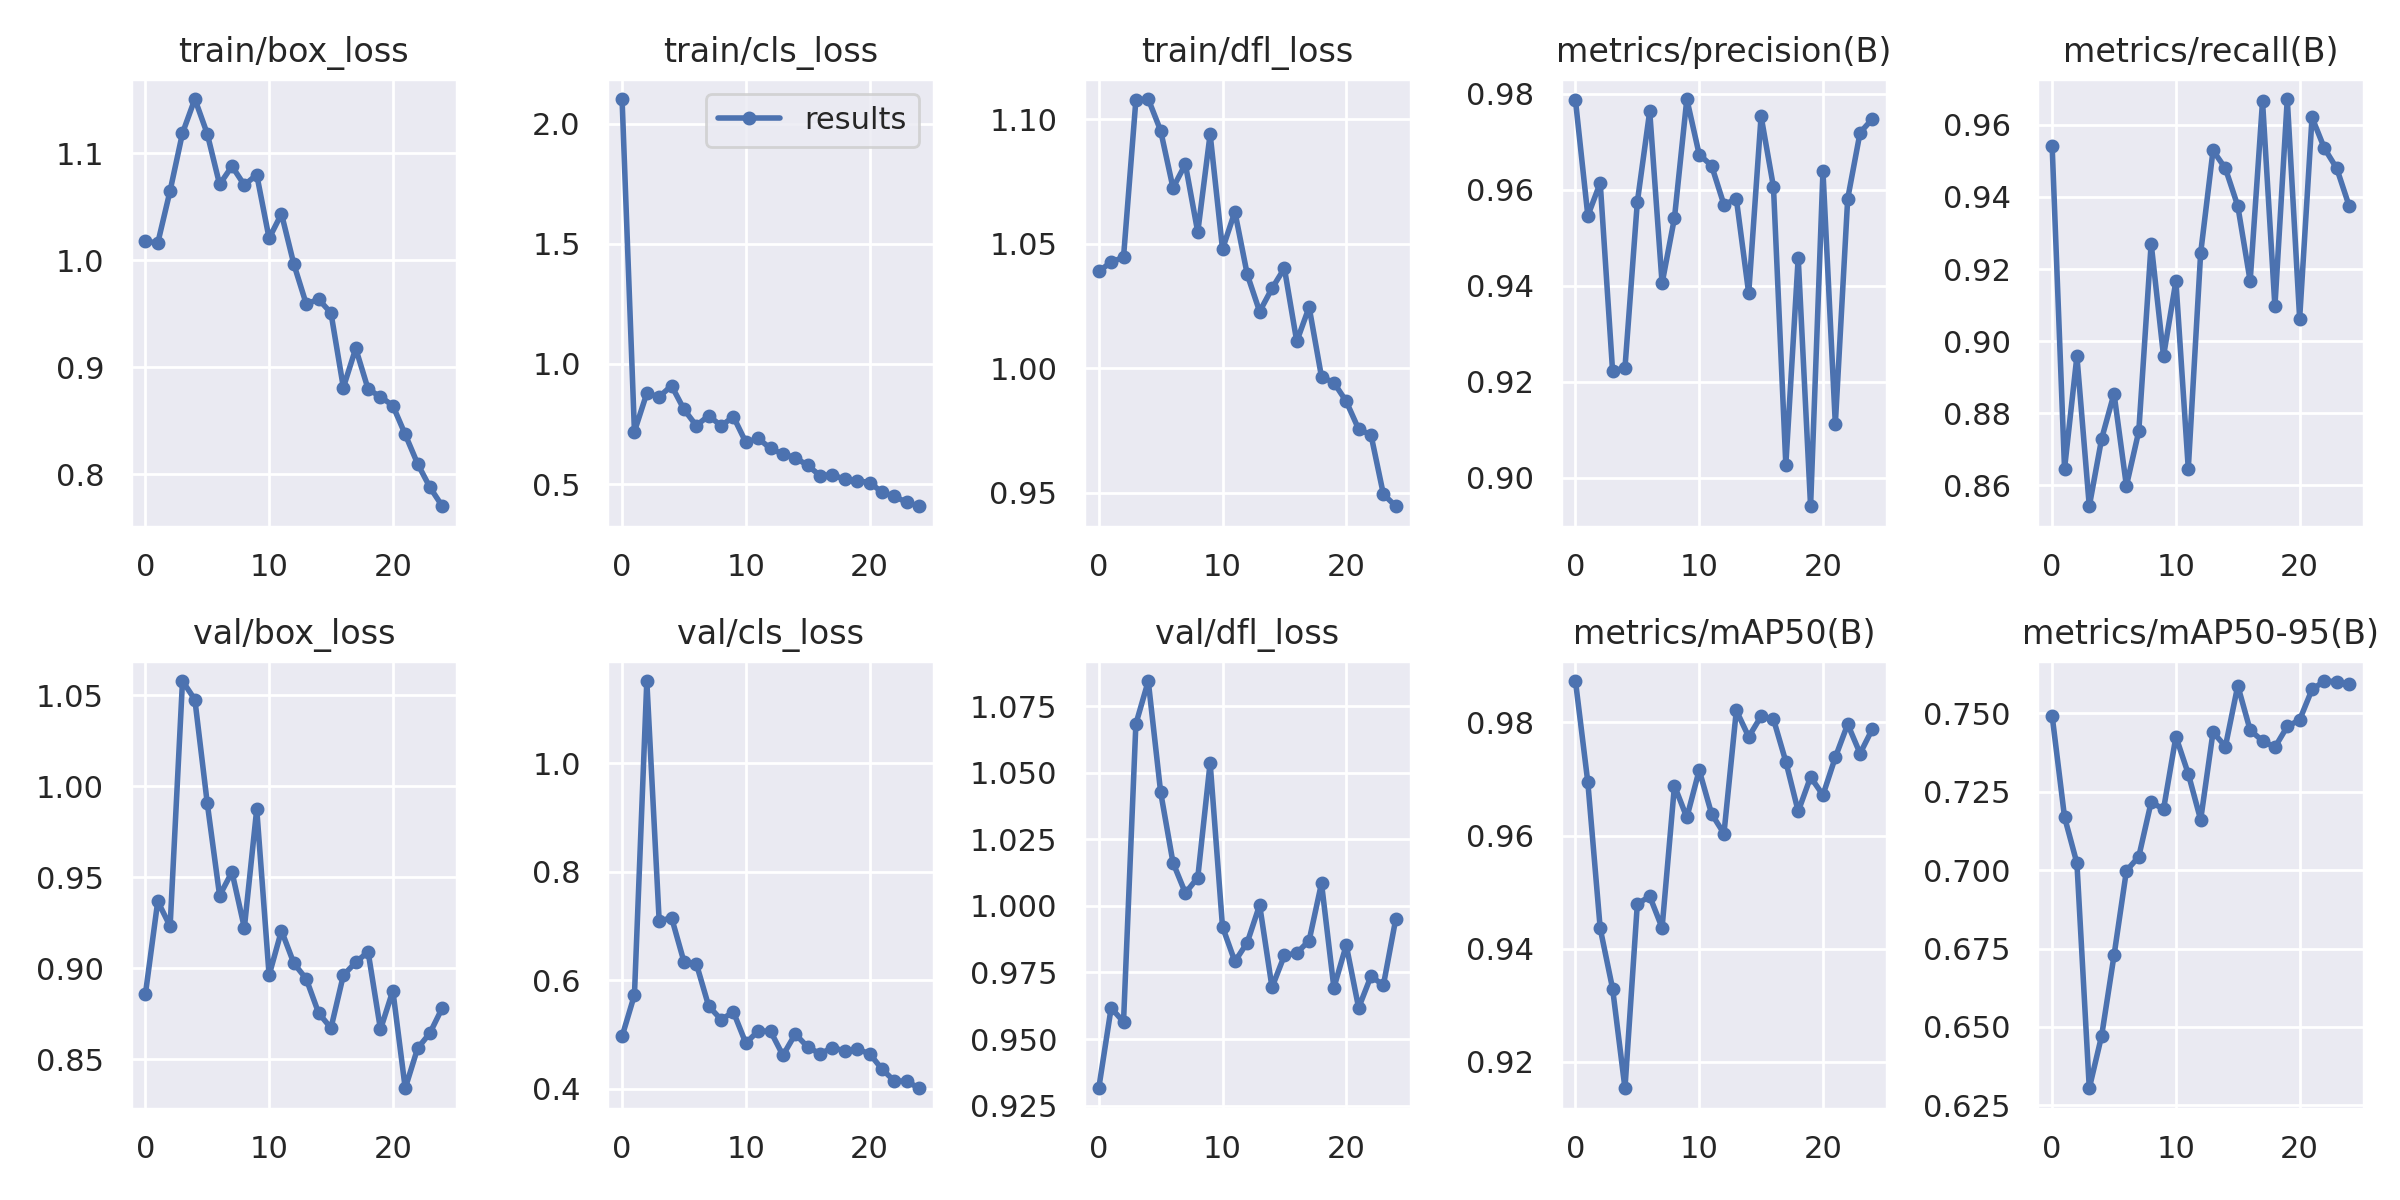

In [9]:
Image(filename=f'/kaggle/working/datasets/runs/detect/train/results.png', width=600)

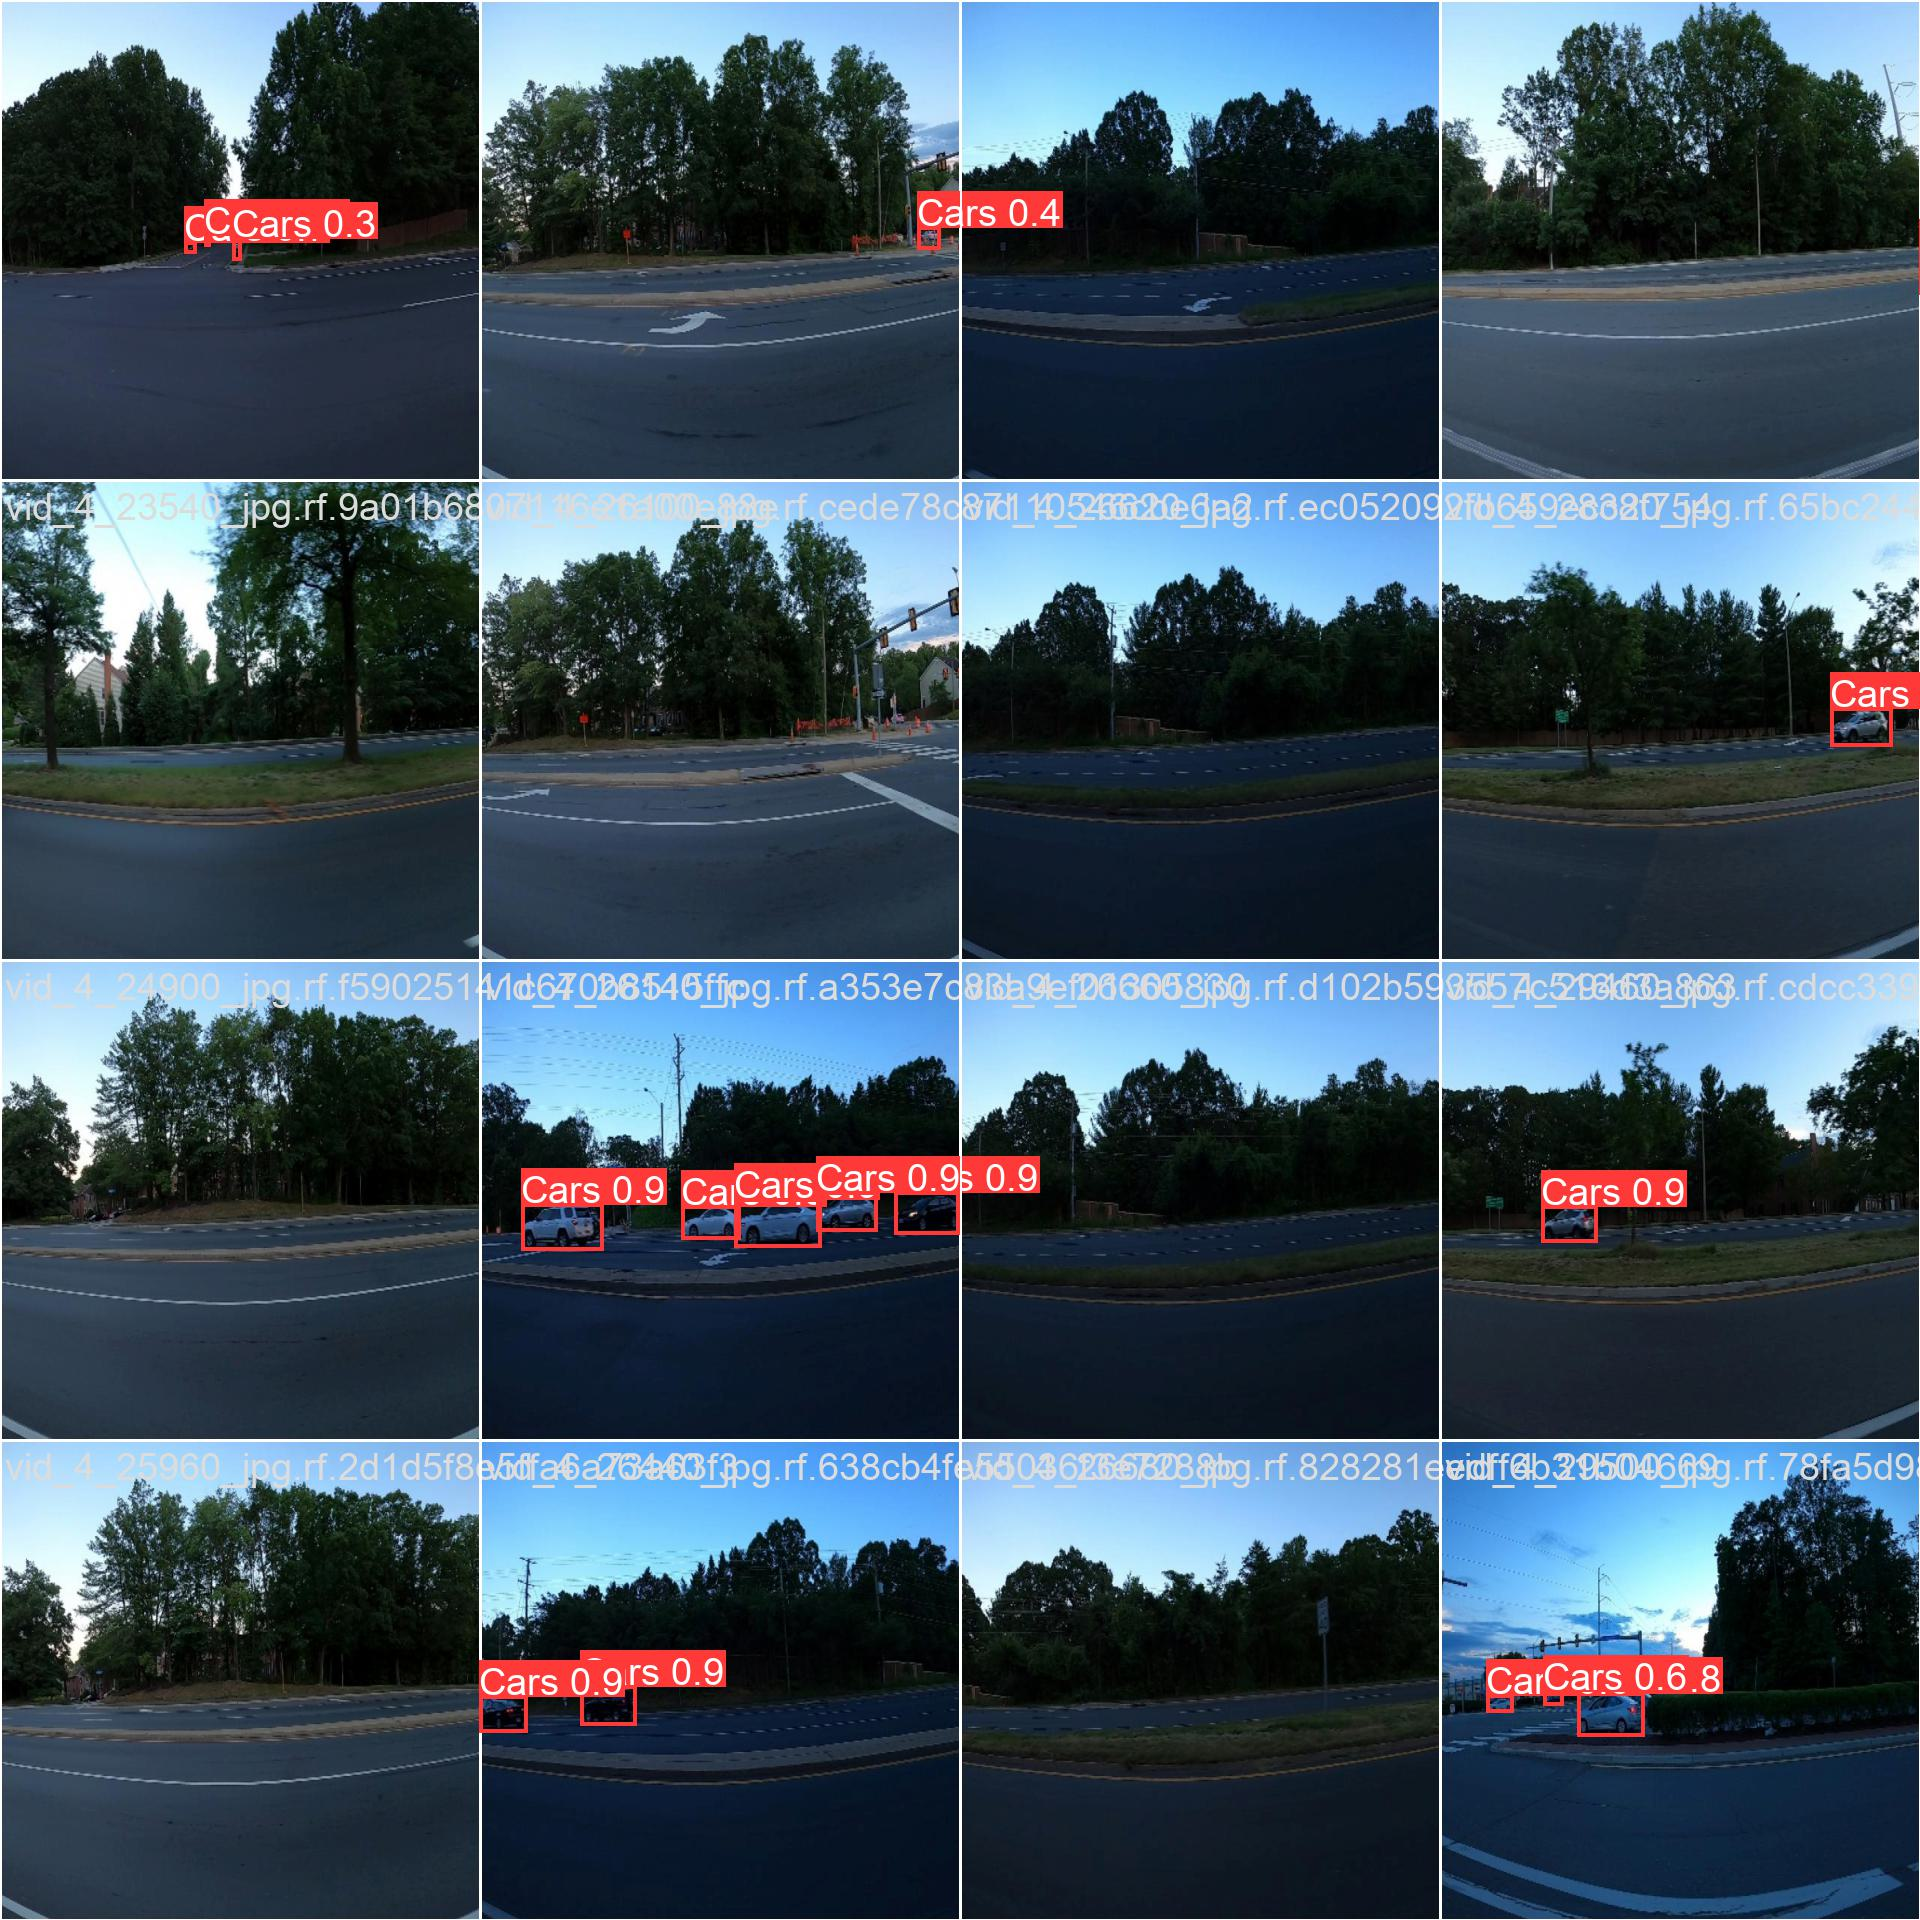

In [10]:
Image(filename=f'/kaggle/working/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=detect mode=val model=/kaggle/working/datasets/runs/detect/train/weights/best.pt data=/kaggle/working/datasets/Car-Detection-2/data.yaml

Ultralytics YOLOv8.0.11 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Car-Detection-2/valid/labels... 136 image
val: New cache created: /kaggle/working/datasets/Car-Detection-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        136         96      0.958      0.959      0.982      0.753
Speed: 4.3ms pre-process, 10.4ms inference, 0.0ms loss, 1.3ms post-process per image


In [12]:
!ls /kaggle/working/datasets/Car-Detection-2/test

images	labels


In [13]:
!yolo task=detect mode=predict model=/kaggle/working/datasets/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/datasets/Car-Detection-2/test/images

Ultralytics YOLOv8.0.11 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10020_jpg.rf.b03d40301f290a585faa58bfd5848014.jpg: 640x640 1 Cars, 20.6ms
image 2/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10060_jpg.rf.4f8eafcb920e018b9cfa12911d7f7b48.jpg: 640x640 1 Cars, 20.6ms
image 3/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10140_jpg.rf.68e2fc4b9c2869436e77a11d8f6df6c4.jpg: 640x640 1 Cars, 20.7ms
image 4/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10360_jpg.rf.82c339f993439116e06443fa05dd05f9.jpg: 640x640 20.6ms
image 5/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10400_jpg.rf.3af47b71972b7d1a5b154e4219f10873.jpg: 640x640 20.6ms
image 6/68 /kaggle/working/datasets/Car-Detection-2/test/images/vid_4_10600_jpg.rf.454e21f06ccda90a445803f481c7be3f.jpg: 640x640 19

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")